In [126]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [127]:
wine, labels = datasets.load_wine(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_wine = rand_proj.fit_transform(wine)

iris, target = datasets.load_iris(return_X_y=True)
projected_iris = rand_proj.fit_transform(iris)

In [128]:
def min_max_scale(x):
  min_value, max_value = np.min(x,0), np.max(x,0)
  x = (x - min_value)/(max_value - min_value)
  return x

In [129]:
def plot_wine(wine, labels, position, projection):
  wine = min_max_scale(wine)
  if projection == '3d':
    ax = plt.subplot(position, projection = projection)
    for i in range(wine.shape[0]):
      ax.text(wine[i, 0], wine[i, 1], wine[i,2], str(labels[i]), 
              color=plt.cm.Set1((labels[i]/10.)+.1), fontdict={'weight':'bold', 'size':9})
    ax.view_init(4, -72)
  elif projection=='2d':
    ax = plt.subplot(position)
    for i in range(wine.shape[0]):
      ax.text(wine[i, 0], wine[i, 1], str(labels[i]), 
              color=plt.cm.Set1((labels[i]/10.)+.1), fontdict={'weight':'bold', 'size':9})

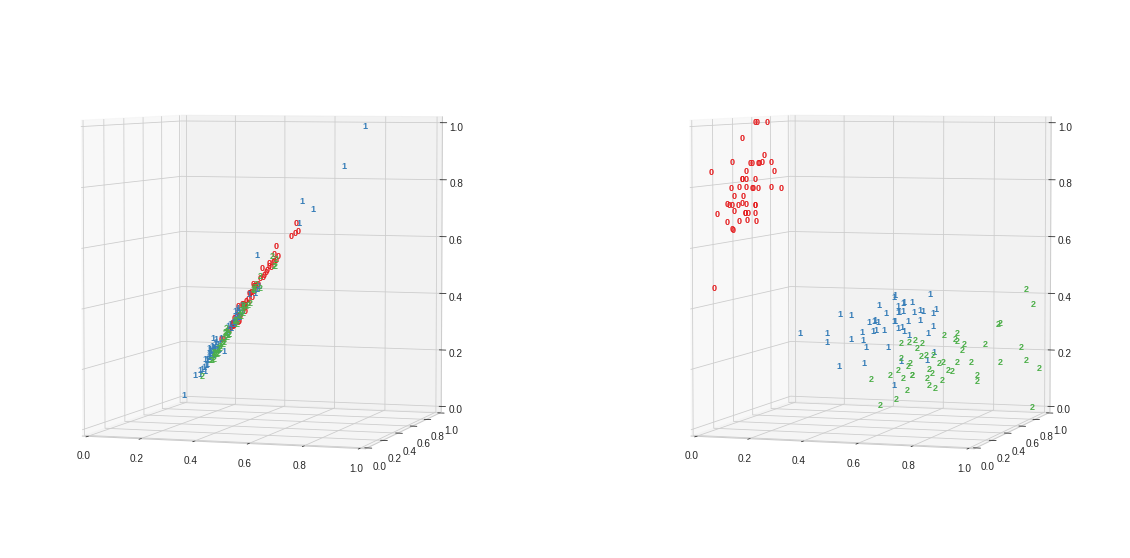

In [131]:
fig = plt.figure(figsize=(20, 10))
plot_wine(projected_wine, labels, 121, '3d')
plot_wine(projected_iris, target, 122, '3d')

In [133]:
wine_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='standard', random_state=0).fit_transform(wine)
iris_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='standard', random_state=0).fit_transform(iris)

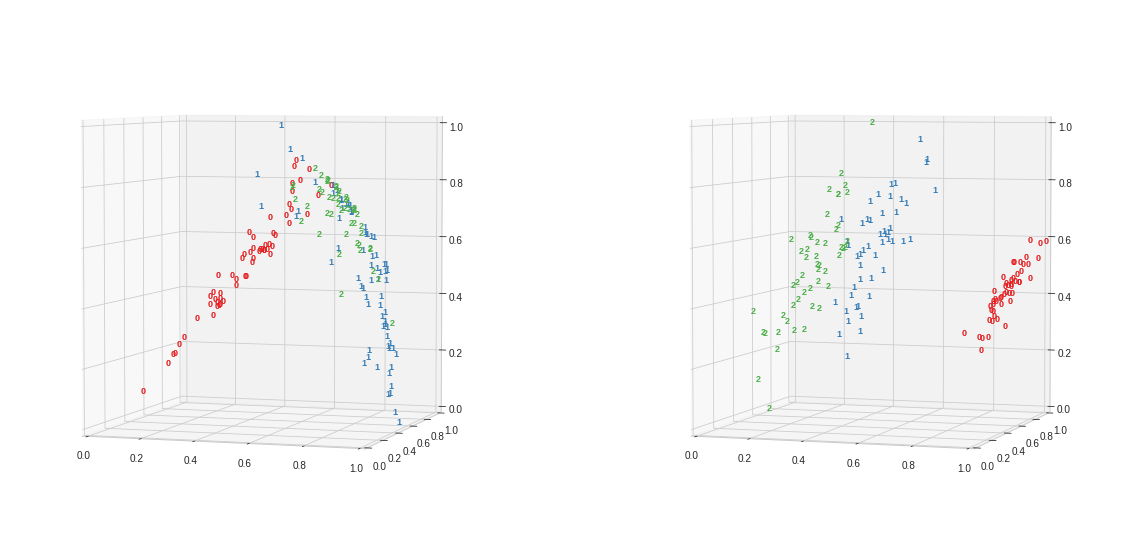

In [134]:
fig = plt.figure(figsize=(20, 10))
plot_wine(wine_lle, labels, 121, '3d')
plot_wine(iris_lle, target, 122, '3d')

In [135]:
wine_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='ltsa', random_state=0).fit_transform(wine)
iris_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='ltsa', random_state=0).fit_transform(iris)

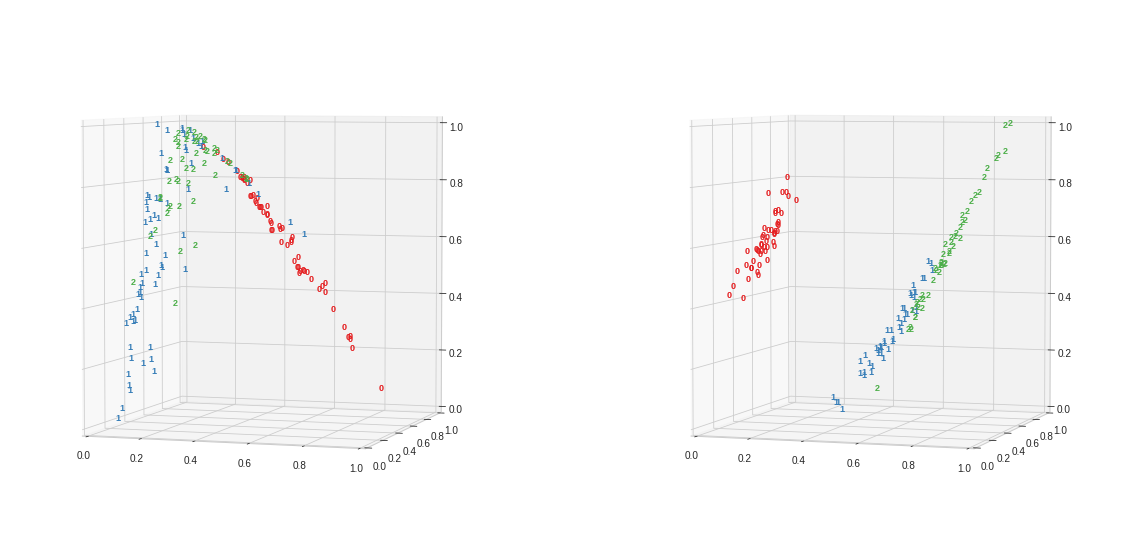

In [136]:
fig = plt.figure(figsize=(20, 10))
plot_wine(wine_ltsa, labels, 121, '3d')
plot_wine(iris_ltsa, target, 122, '3d')

In [141]:
wine_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='modified', random_state=0).fit_transform(wine)
iris_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=3,
                                             method='modified', random_state=0).fit_transform(iris)

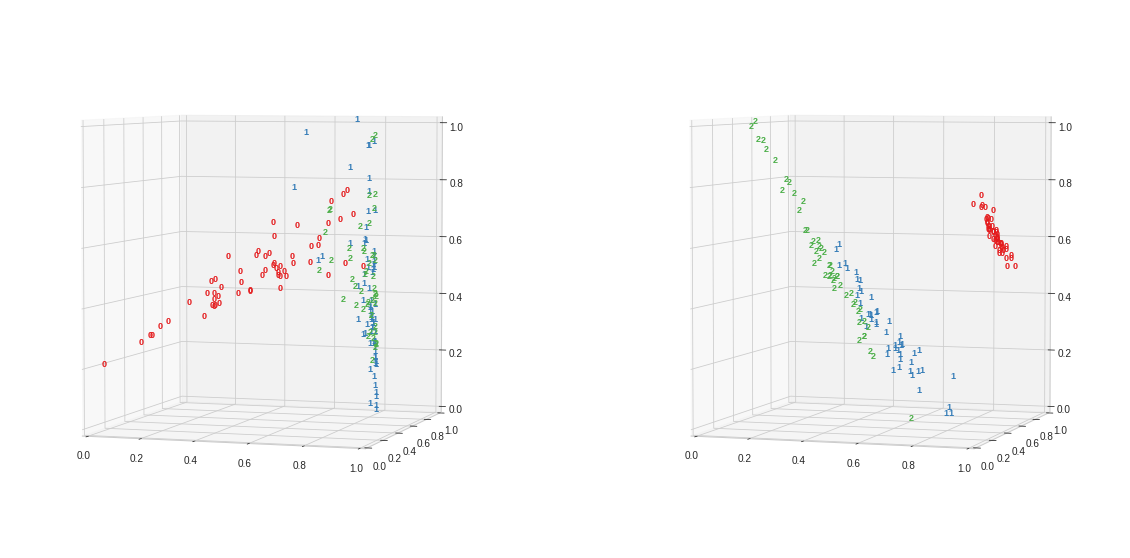

In [142]:
fig = plt.figure(figsize=(20, 10))
plot_wine(wine_mlle, labels, 121, '3d')
plot_wine(iris_mlle, target, 122, '3d')

In [143]:
wine_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(wine)
iris_isomap = manifold.Isomap(n_neighbors=30, n_components=3).fit_transform(iris)

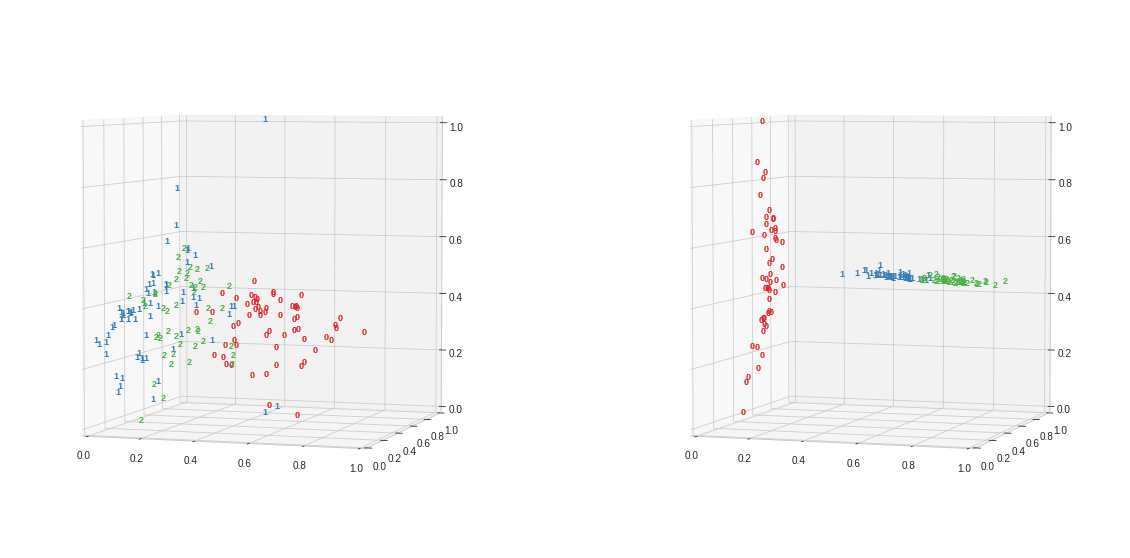

In [145]:
fig = plt.figure(figsize=(20, 10))
plot_wine(wine_isomap, labels, 121, '3d')
plot_wine(iris_isomap, target, 122, '3d')

In [146]:
wine_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(wine)
iris_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(iris)

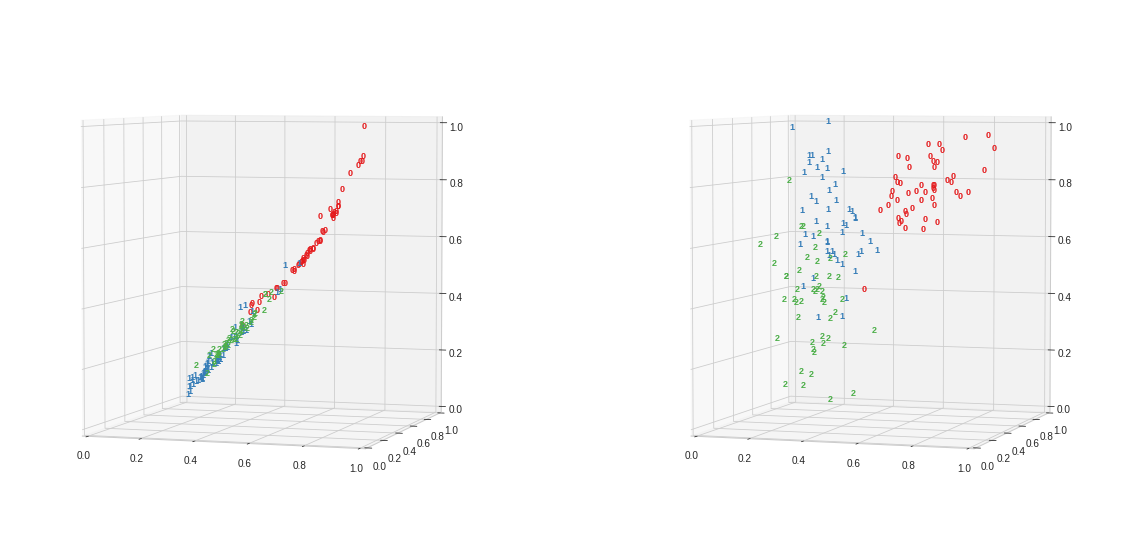

In [149]:
fig = plt.figure(figsize=(20, 10))
plot_wine(wine_mds, labels, 121, '3d')
plot_wine(iris_mds, target, 122, '3d')

In [71]:
wine_se = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(wine)

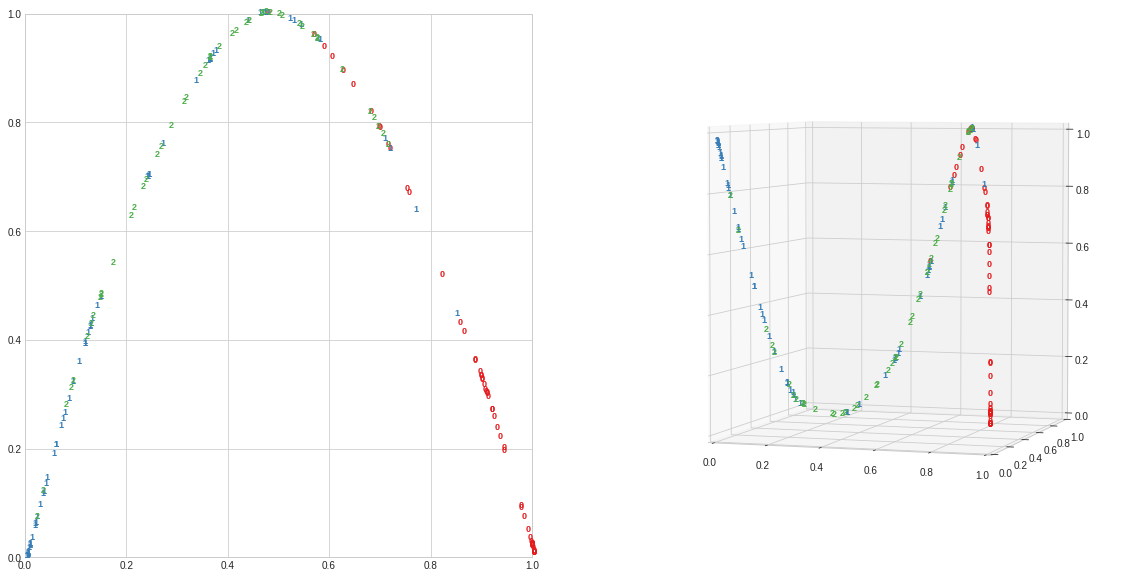

In [72]:
fig = plt.figure(figsize=(20, 20))
plot_wine(projected_wine, labels, 221, '2d')
plot_wine(projected_wine, labels, 222, '3d')
plot_wine(projected_cancer, target, 223, '2d')
plot_wine(projected_cancer, target, 224, '3d')

In [151]:
wine_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(wine)
iris_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(iris)

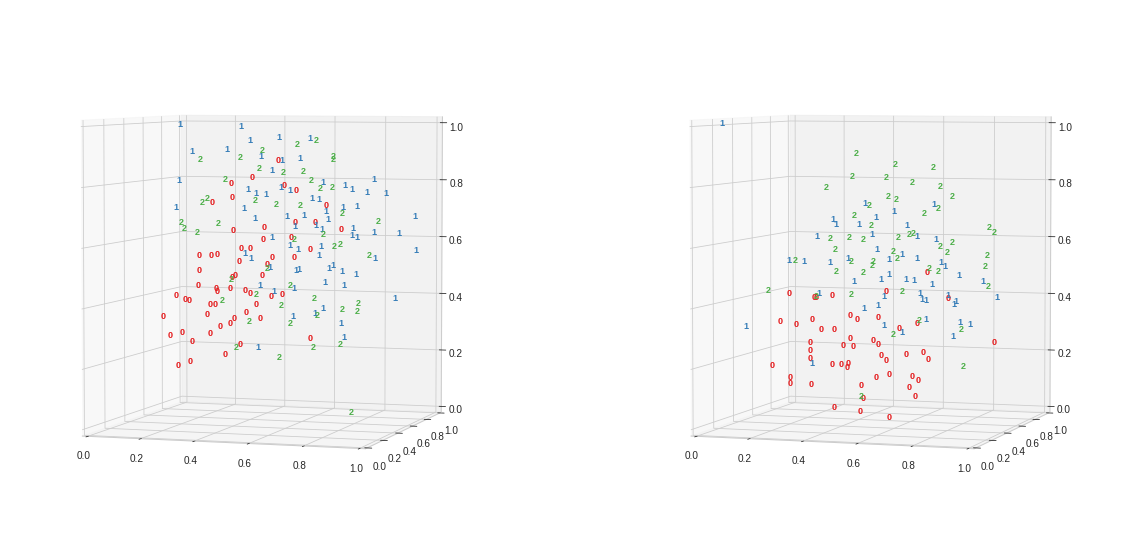

In [152]:
fig = plt.figure(figsize=(20, 10))
plot_wine(wine_tsne, labels, 121, '3d')
plot_wine(iris_tsne, target, 122, '3d')

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [76]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [153]:
raw_wine, target = datasets.load_wine(return_X_y=True)
raw_iris, target_i = datasets.load_iris(return_X_y=True)

In [160]:
score = cross_val_score(
    estimator = knn,
    X = raw_wine,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = knn,
    X = raw_iris,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.72222222 0.66666667 0.63888889 0.65714286 0.77142857]
mean cross val score: 0.6912698412698413 (+/- 0.04877951071049148)
[0.96666667 1.         0.93333333 0.96666667 1.        ]
mean cross val score: 0.9733333333333334 (+/- 0.02494438257849294)


In [161]:
score = cross_val_score(
    estimator = svm,
    X = raw_wine,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = svm,
    X = raw_iris,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.63888889 0.61111111 0.63888889 0.68571429 0.74285714]
mean cross val score: 0.6634920634920635 (+/- 0.04636170738133653)
[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
mean cross val score: 0.9666666666666666 (+/- 0.02108185106778919)


In [162]:
score = cross_val_score(
    estimator = decision_tree,
    X = raw_wine,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = decision_tree,
    X = raw_iris,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.91666667 0.75       0.88888889 0.91428571 0.85714286]
mean cross val score: 0.8653968253968254 (+/- 0.06157134468458992)
[0.96666667 0.96666667 0.9        0.96666667 1.        ]
mean cross val score: 0.9600000000000002 (+/- 0.03265986323710903)


In [163]:
score = cross_val_score(
    estimator = random_forest,
    X = raw_wine,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = random_forest,
    X = raw_iris,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.94444444 0.94444444 0.97222222 0.97142857 1.        ]
mean cross val score: 0.9665079365079364 (+/- 0.020746948644437477)
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
mean cross val score: 0.9666666666666668 (+/- 0.02108185106778919)


In [164]:
score = cross_val_score(
    estimator = random_forest,
    X = wine_tsne,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = random_forest,
    X = iris_tsne,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.61111111 0.66666667 0.69444444 0.77142857 0.74285714]
mean cross val score: 0.6973015873015873 (+/- 0.056472255544280356)
[0.8        0.86666667 0.8        0.86666667 0.86666667]
mean cross val score: 0.8400000000000001 (+/- 0.03265986323710904)


In [165]:
score = cross_val_score(
    estimator = svm,
    X = wine_tsne,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = svm,
    X = iris_tsne,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.66666667 0.72222222 0.72222222 0.8        0.82857143]
mean cross val score: 0.747936507936508 (+/- 0.05854884065677527)
[0.8        0.83333333 0.8        0.9        0.86666667]
mean cross val score: 0.8400000000000001 (+/- 0.038873012632301994)


In [166]:
score = cross_val_score(
    estimator = decision_tree,
    X = wine_tsne,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = decision_tree,
    X = iris_tsne,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.55555556 0.63888889 0.61111111 0.6        0.68571429]
mean cross val score: 0.6182539682539682 (+/- 0.04310919415052178)
[0.7        0.8        0.66666667 0.8        0.8       ]
mean cross val score: 0.7533333333333333 (+/- 0.05811865258054236)


In [167]:
score = cross_val_score(
    estimator = random_forest,
    X = wine_tsne,
    y = target,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

score = cross_val_score(
    estimator = random_forest,
    X = iris_tsne,
    y = target_i,
    cv=5
)
print(score)
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

[0.55555556 0.58333333 0.58333333 0.62857143 0.71428571]
mean cross val score: 0.613015873015873 (+/- 0.05578772349919356)
[0.76666667 0.83333333 0.8        0.93333333 0.86666667]
mean cross val score: 0.8400000000000002 (+/- 0.0573488351136175)
